# **Actividad 2.2: LDA y Árboles de Decisión**

**Base de datos obtenida de una clase diferente (modelos de análitica predictiva):** https://raw.githubusercontent.com/jose-morcillo/Predictive_Analytics/dasets/Iris_dataset_binary.csv

**Objetivo:** Realizar un modelo predictivo para la variable **'species'** dentro de una base de datos que describe las caracteristicas/medias de diferentes flores.

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder #Equivalente a cat.codes
#Importar libreria para dividir los datos en training | test
from sklearn.model_selection import train_test_split
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
#Scaler
from sklearn.preprocessing import StandardScaler
#Árbol de Desición
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, LeaveOneOut
#Matriz de confusión
#Matriz de confusión
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay as cmd

1. Importa los datos a tu ambiente de trabajo y separa los datos en entrenamiento y prueba, con una relación que consideres adecuada, manteniendo un balance de clases. Demuestra que se cumplió la condición imprimiendo datos relevantes en la consola.

In [40]:
url= 'https://raw.githubusercontent.com/jose-morcillo/Predictive_Analytics/dasets/Iris_dataset_binary.csv'
df = pd.read_csv(url)
df = df.drop(['Unnamed: 0'], axis=1)
df['species_category'] = LabelEncoder().fit_transform(df['species'])
#Balance de datos
print('Balance de la base de datos completa:')
print(df['species_category'].value_counts())
x = df.drop(columns=['species', 'species_category'])
y = df['species_category']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)
print('Balance de los datos de entrenamiento:')
print(y_train.value_counts())
print('Balance de los datos de validación:')
print(y_test.value_counts())

Balance de la base de datos completa:
species_category
0    50
1    50
Name: count, dtype: int64
Balance de los datos de entrenamiento:
species_category
1    40
0    40
Name: count, dtype: int64
Balance de los datos de validación:
species_category
1    10
0    10
Name: count, dtype: int64


2. Corre una regresión logística simple con la función GLM de statsmodels con todas tus variables de entrada e imprime el resumen del modelo en consola. Indica cuáles son las 2 variables más relevantes para este estudio y selecciónalas, eliminando todas las demás variables de tus datos de entrenamiento y prueba.

In [41]:
gamma_model = sm.GLM(y, x, family=sm.families.Gamma())
gamma_results = gamma_model.fit()
print(gamma_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       species_category   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                   Gamma   Df Model:                            3
Link Function:           InversePower   Scale:                          2.3776
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Thu, 20 Mar 2025   Deviance:                       3771.2
Time:                        13:36:39   Pearson chi2:                     228.
No. Iterations:                    10   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
sepal length (cm)     1.8876      0.42

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:812: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1891: RuntimeWarning: invalid value encountered in scalar subtract
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


Según el P Values, todas las variables son importantes para explicar la variable de salida, pero nosotros solo necesitamos dos para este análisis. Las medidas de todas las flores están en centimetros, lo cuál nos da una unidad de medida especifica para todas nuestras cantidades, pero no podemos estar seguros de que las medidas estén en los mismos intervalos, es decir, no podemos estar seguros de si el número dado en el 'coef' afecta 'mucho' o 'poco' a ciencia cierta.
<p>De todas las variables podemos eliminar **'petal width'** con más certeza que el resto, pues es la única que no tiene un valor de 0.000.</p>
<p>Podemos realizar el modelo de nuevo para comprobar si en verdad estas tres variables restantes son significativas o si podemos eliminar otra más.</p>

In [42]:
x = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]
gamma_model = sm.GLM(y, x, family=sm.families.Gamma())
gamma_results = gamma_model.fit()
print(gamma_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       species_category   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                   Gamma   Df Model:                            2
Link Function:           InversePower   Scale:                          2.5577
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Thu, 20 Mar 2025   Deviance:                       3843.4
Time:                        13:36:39   Pearson chi2:                     248.
No. Iterations:                    12   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
sepal length (cm)     2.3514      0.45

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:812: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1891: RuntimeWarning: invalid value encountered in scalar subtract
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


Efectivamente, según el P values, todas estás variables aportan informaión relevante al modelo, pero el valor en la columna 'coef' cambió ligeramente. Aunque no estemos muy seguros de cuáles son las medidas normales de estas plantas, podemos utilizar esta columna para seleccionar una variable dado que no tenemos mucha más información pertinente.
<p>Tomando esto en cuenta, utilizaremos las variables **'petal length (cm)'** y **'sepal width (cm)'** para este análisis, que son variables cuyo P values es 0.000 y cuyo 'coef' es mayor que el de la variable restante.</p>

In [43]:
x = df[['petal length (cm)', 'sepal width (cm)']]
x_train, x_test, y_train, y_testLDA = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)
print('Balance de los datos de entrenamiento:')
print(y_train.value_counts())
print('Balance de los datos de validación:')
print(y_test.value_counts())

Balance de los datos de entrenamiento:
species_category
1    40
0    40
Name: count, dtype: int64
Balance de los datos de validación:
species_category
1    10
0    10
Name: count, dtype: int64


Se puede observar que seguimos conservado un balance de clases, lo cuál es ideal.

3. Genera un modelo usando la metodología de linear discriminant analysis. Visualiza la función discriminante con una gráfica de variable 1 vs variable 2, donde cada observación tenga algo que la distinga dependiendo de su clase (por ejemplo, distinto color, distinto marcador, etc.)

Accuracy:  1.0


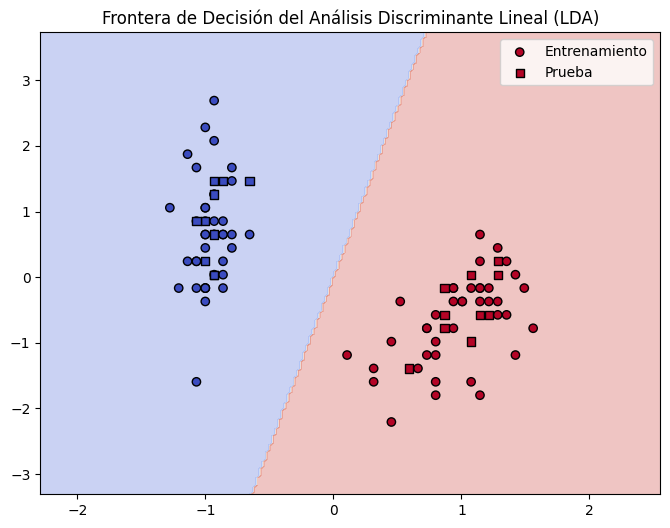

In [44]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_trainLDA = scaler.fit_transform(x_train)
x_testLDA = scaler.transform(x_test)
#Aplicar LDA
lda = LinearDiscriminantAnalysis()
lda.fit(x_trainLDA, y_train)
y_predLDA = lda.predict(x_testLDA)
accuracyLDA = accuracy_score(y_testLDA, y_predLDA)
print('Accuracy: ', accuracyLDA)
#Gráfca realizada con ayuda de ChatGPT
# Crear una malla para la frontera de decisión
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar los datos y la frontera de decisión
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')  # Frontera de decisión
plt.scatter(x_trainLDA[:, 0], x_trainLDA[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', label="Entrenamiento")
plt.scatter(x_testLDA[:, 0], x_testLDA[:, 1], c=y_test, cmap='coolwarm', marker='s', edgecolors='k', label="Prueba")
plt.title("Frontera de Decisión del Análisis Discriminante Lineal (LDA)")
plt.legend()
plt.show()

LDA cuenta con un accuracy de 1.0, es decir, acierta todos las observaciones. De forma visual es más fácil de ver tomando en cuenta la división creada por el modelo, es decir, la línea diagonal que parte los datos en la zona azul y la zona roja. Podemos suponer que la zona azul es una flor y la zona roja es otra, el área coloreada representa el lugar donde el modelo clasificó la flor y el color del punto representa su valor real, entonces podemos decir que, efectivamente, este modelo tiene un accuracy del 100% pues la clasificación (gráficamente) es correcta.

4. Genera un modelo usando la metodología de árboles de decisión. Deberás podar el árbol,
habiendo seleccionado primero un valor óptimo de 𝛼 mediante una metodología de
LOOCV. Visualiza tanto el árbol resultante, como la partición en una gráfica de variable 1
vs variable 2, donde cada observación tenga algo que la distinga dependiendo de su
clase.

In [45]:
x = df[['petal length (cm)', 'sepal width (cm)']]
X_train, X_test, y_train, y_testTree = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)
# Código hecho con ayuda de ChatGPT
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

# Obtener los valores de alpha para la poda
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  # Lista de valores de alpha

# Configurar LOOCV
loo = LeaveOneOut()

# Configurar la búsqueda del mejor alpha con GridSearchCV
param_grid = {'ccp_alpha': ccp_alphas}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=loo, scoring='accuracy', n_jobs=-1)

# Ejecutar la búsqueda
grid_search.fit(X_train, y_train)

# Obtener el mejor valor de alpha
best_alpha = grid_search.best_params_['ccp_alpha']
print(f"Mejor alpha encontrado: {best_alpha}")

# Entrenar un nuevo árbol con la poda óptima
pruned_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
pruned_tree.fit(X_train, y_train)

Mejor alpha encontrado: 0.0


DecisionTreeClassifier(ccp_alpha=np.float64(0.0), random_state=0)

Accuracy:  1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


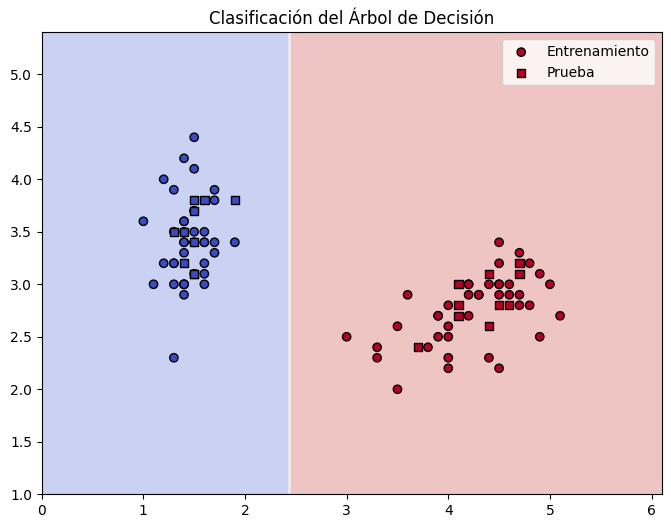

In [46]:
y_predTree = pruned_tree.predict(X_test)
accuracyTree = accuracy_score(y_testTree, y_predTree)
print('Accuracy: ', accuracyTree)

#Mismo código que antes hecho con ayuda de ChatGPT
x = x.to_numpy()
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = pruned_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

X_train = X_train.to_numpy()
plt.figure(figsize=(8, 6))
X_test = X_test.to_numpy()
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', label="Entrenamiento")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_testTree, cmap='coolwarm', marker='s', edgecolors='k', label="Prueba")
plt.title("Clasificación del Árbol de Decisión")
plt.legend()
plt.show()

La clasificación hecha por un árbol de decisión también tiene un accuracy de 1.0, y podemos ver que este es el caso gráficamente. La zona azul es lo que el modelo considera una flor y la zona roja es otra flor, los colores en los puntos representan su valor real, así que por esto sabemos que el modelo hace un muy buen trabajo clasificando las observaciones a las zonas a las que pertenecen.

5. Calcula, para ambos modelos, todas las métricas revisadas en clase en los datos de
prueba. Indica qué opinas sobre los resultados, especificando si crees que uno de los dos
modelos es mejor para esta tarea específica.

Accuracy LDA:  1.0


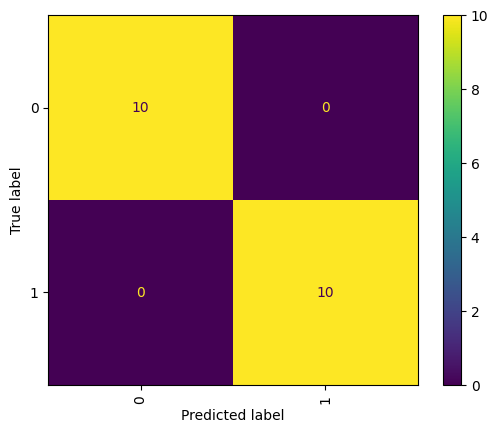

In [47]:
print('Accuracy LDA: ', accuracyLDA)
#Vector de probabilidades
y_probsLDA = lda.predict_proba(x_testLDA)[:, 1]
#Matriz de confusión
cm = confusion_matrix(y_testLDA, y_predLDA)
#sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
cmd(cm,display_labels=lda.classes_).plot(xticks_rotation="vertical")

Accuracy Tree:  1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


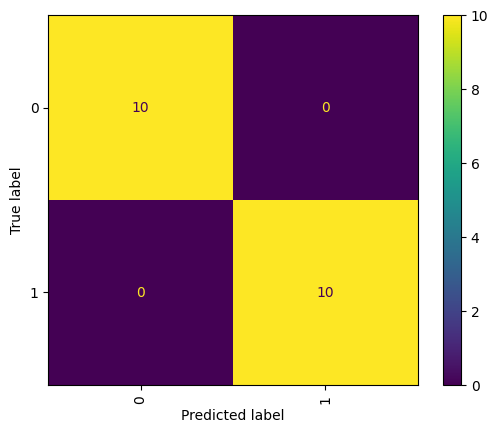

In [48]:
print('Accuracy Tree: ', accuracyTree)
#Vector de probabilidades
y_probsLDA = pruned_tree.predict_proba(X_test)[:, 1]
#Matriz de confusión
cm = confusion_matrix(y_testTree, y_predTree)
#sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
cmd(cm,display_labels=pruned_tree.classes_).plot(xticks_rotation="vertical")

El modelo LDA y el modelo del árbol de decisión tienen el mismo nivel de accuracy, en este sentido, ningúno de los dos es mejor que el otro, sin embargo podemos mirar la linea que divide a ambas clases y es donde encontramos algunas diferencias en cómo el modelo realiza clasificaciones.
<p>El árbol tiene una zona ligeramente más pequeña para las flores que clasifica como azules. Esto podría representar un problema si una observación se acerca demasiado a la mitad del gráfico, que es dónde el modelo de LDA podría clasificar esta misma observación en la zona azul sin el este problema.</p>
<p>De cualquier forma, ambos modelos pueden ser muy buenos y la preferencia está en la persona que vaya a utilizar dicho modelo.</p>

### "Doy mi palabra de que he realizado esta actividad con integridad académica."